# Classifying fashion apparel- Getting started with Convolutional Neural Networks

This is the second part for getting started with Computer Vision. If you are new to this, please check out my beginner tutorial on [Towards Data Science](https://towardsdatascience.com/classifying-fashion-apparel-getting-started-with-computer-vision-271aaf1baf0).


![fashion MNIST](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)


## Problem

In the first tutorial, we used simple layers to build our model. In this example, we expand on this knowledge to build a new type of model called Convolutional Neural Networks. We will also see how we can improve our model accuracy significantly using CNNs. Check out the article [here.](https://)

## Data

Data is obtained from `keras.datasets.fashion_mnist`

## Features

Each training and test example is assigned to one of the following labels:

**Label- Description**

0-	T-shirt/top

1-	Trouser

2-	Pullover

3-	Dress

4-	Coat

5-	Sandal

6-	Shirt

7-	Sneaker

8-	Bag

9-	Ankle boot


## Building the model

### Loading the data

In [0]:
# Import the necessary libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils 
import random

Using TensorFlow backend.


In [0]:
# Import the data from keras.dataset

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

### Preprocessing the data

In [0]:
# Normalize the input image so that each pixel value is between 0 to 1.

train_images = train_images / 255.0
test_images = test_images / 255.0

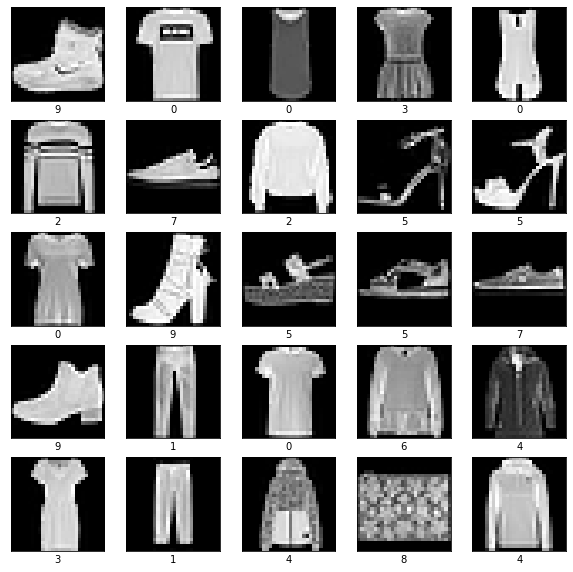

In [0]:
# Show the first 25 images in the training dataset.

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.gray)
  plt.xlabel(train_labels[i])
plt.show()

## Create the model

Our model takes a 28px x 28px grayscale image as an input, and outputs a float array of length 10 representing the probability of the image being an apparel. (There are 10 different apparels in the dataset labelled from 0-9)

In [0]:
# Define the model

model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

# Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4075 - accuracy: 0.8551
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2826 - accuracy: 0.8995
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2406 - accuracy: 0.9136
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2141 - accuracy: 0.9231
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1918 - accuracy: 0.9304
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1760 - accuracy: 0.9362
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1632 - accuracy: 0.9396
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1525 - accuracy: 0.9446
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1427 - accuracy: 0.9469
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.134

In [0]:
# Check the structure of our model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                9

## Test the model

In [0]:
# Evaluate the model using all images in the test dataset.

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.9203
Test accuracy: 0.9203000068664551


## Visualising the results

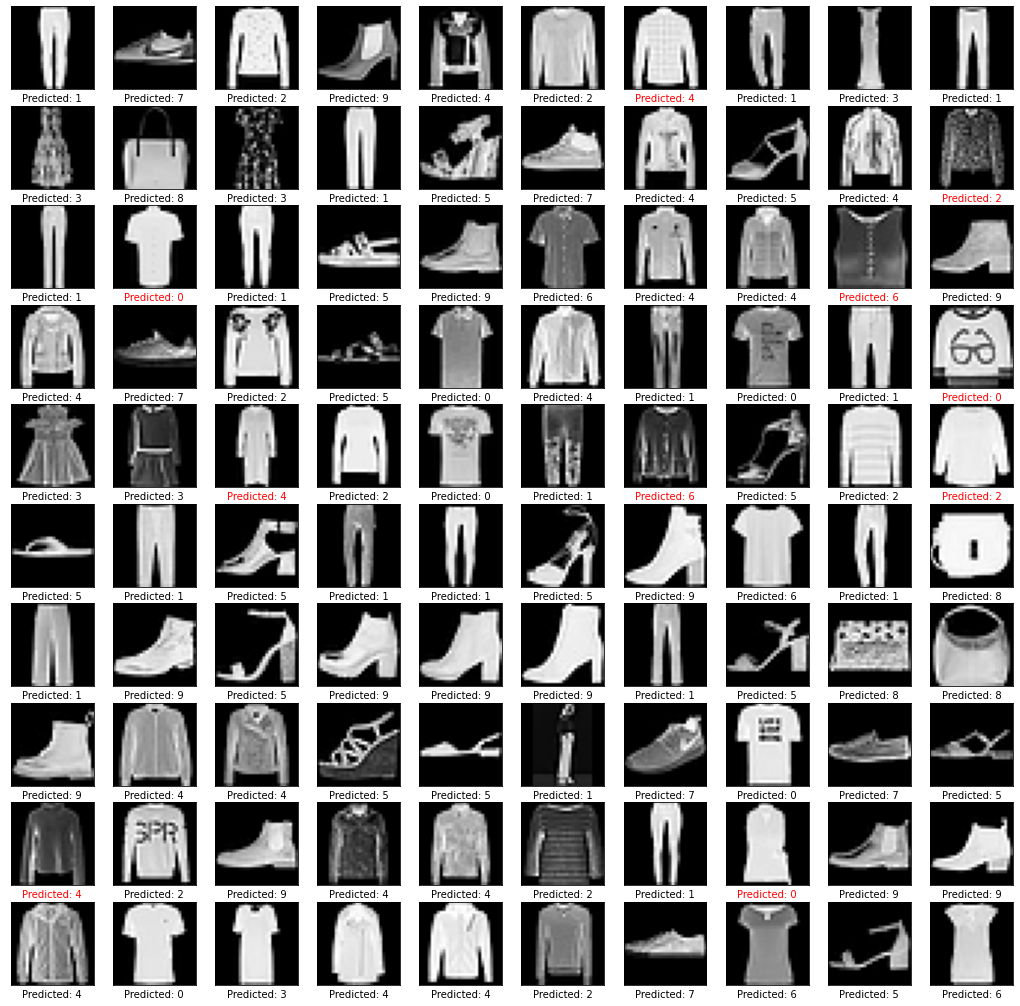

In [0]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Predict the labels of digit images in our test dataset.

predictions = model.predict(test_images)

# As the model output 10 float representing the probability of the input image
# being a digit from 0 to 9, we need to find the largest probability value
# to find out which digit the model predicts to be most likely in the image.

prediction_digits = np.argmax(predictions, axis=1)

# Then plot 100 random test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.

plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(test_images[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()